In [5]:
import warnings
import numpy as np
import pandas as pd
from collections import Counter

# Sklearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

**Contexto dos Dados**

- Base Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- Telco é uma companhia que provê telefone e internet residencial
- Conteúdo: Cada linha representa um consumidor, cada coluna contém um atributito deste cliente na empresa

In [6]:
df = pd.read_csv("../Dados/telco_dataset.csv")
df.drop(['customerID'],axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
len(df[df['Churn'] == 'Yes'])/len(df)

0.2653698707936959

## Pré-processamento

### 1. Tratamento dos Dados

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)

In [10]:
num = ["tenure", "MonthlyCharges", "TotalCharges"]
categ = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

In [11]:
for col in num:
    try:df[col] = df[col].astype("float")
    except:print(col)

In [12]:
for col in categ:
    try:
        df[col] = df[col].astype("str")
        df[col] = df[col].str.strip()
    except:
        print(col)

### 2. Transformação dos Dados

In [13]:
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' or c == 'SeniorCitizen']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

In [14]:
df_categorical.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0,0,0,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,1,0,1,0,1,1,0,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,1,0,1,0,1,0,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True


In [15]:
df_categorical.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [16]:
df[num].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


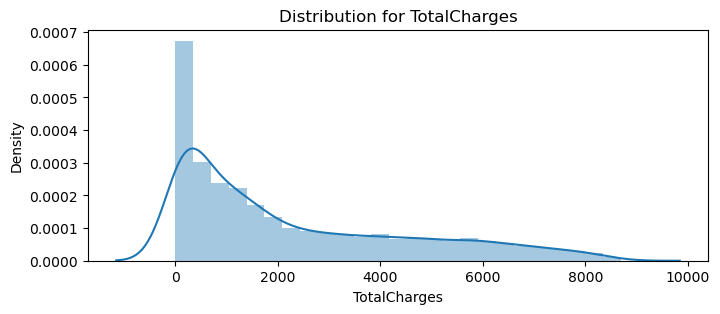

In [17]:
plt.figure(figsize=(8,3))
plt.title("Distribution for {}".format("TotalCharges"))
ax = sns.distplot(df["TotalCharges"])

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num]),columns=num)
df_std.describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825806e+00


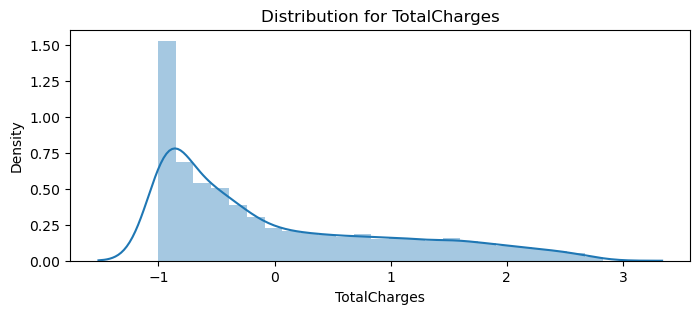

In [19]:
# Verificar que a ditribuição se mantém
plt.figure(figsize=(8,3))
plt.title("Distribution for {}".format("TotalCharges"))
ax = sns.distplot(df_std["TotalCharges"])

In [20]:
df_processed = pd.concat([df_std, df_categorical], axis=1)
df_processed

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,0,0,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1,0.066327,-0.259629,-0.172165,1,0,1,0,1,1,0,...,True,False,False,False,True,False,False,False,False,True
2,-1.236724,-0.362660,-0.958066,1,0,1,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
3,0.514251,-0.746535,-0.193672,1,0,1,0,0,1,0,...,True,False,False,False,True,False,True,False,False,False
4,-1.236724,0.197365,-0.938874,0,0,1,0,1,0,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.127605,1,0,0,1,1,0,0,...,False,False,True,False,True,False,False,False,False,True
7039,1.613701,1.277533,2.242606,0,0,0,1,1,0,0,...,False,False,True,False,True,False,False,True,False,False
7040,-0.870241,-1.168632,-0.852932,0,0,0,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,-1.155283,0.320338,-0.870513,1,1,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True


In [21]:
df_processed.shape

(7043, 41)

## Contruindo o modelo

### 1. Modelo base

In [22]:
train, test = train_test_split(df_processed, test_size=0.2, random_state=50)
predictors = [c for c in train.columns if c not in ['customerID', 'Churn']]

In [23]:
predictors[:3]

['tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
clf = LogisticRegression()
clf.fit(train[predictors], train['Churn'])
y_pred = clf.predict(test[predictors]) #0.5
y_prob = clf.predict_proba(test[predictors])[:, 1]
results = list()

In [25]:
y_prob

array([0.2666546 , 0.01338951, 0.00197896, ..., 0.01090426, 0.38257252,
       0.60241457])

In [26]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
metrics = ['roc_auc', 'accuracy', 'precision']
for m in metrics:
    if m == 'roc_auc':
        results.append((m, roc_auc_score(test['Churn'], y_prob)))
    else:
        results.append((m, eval("{}_score".format(m))(test['Churn'], y_pred)))

In [27]:
results

[('roc_auc', 0.8398723008812596),
 ('accuracy', 0.7998580553584103),
 ('precision', 0.6360759493670886)]

In [28]:
results = list()
y_pred_new_threshold = (clf.predict_proba(test[predictors])[:, 1] >= 0.4).astype(int) 
for m in  metrics:
    results.append((m, eval("{}_score".format(m))(test['Churn'], y_pred_new_threshold)))
results

[('roc_auc', 0.7410725472998372),
 ('accuracy', 0.7835344215755855),
 ('precision', 0.5755395683453237)]

In [29]:
def logistic_regression(df, metrics):

    train, test = train_test_split(df, test_size=0.2, random_state=50)
    predictors = [c for c in train.columns if c not in ['customerID', 'Churn']]
    
    clf = LogisticRegression()
    clf.fit(train[predictors], train['Churn'])
    y_pred = clf.predict(test[predictors]) #0.5
    y_prob = clf.predict_proba(test[predictors])[:, 1]
    results = list()

    for m in metrics:
        if m == 'roc_auc':
            results.append((m, roc_auc_score(test['Churn'], y_prob)))
        else:
            results.append((m, eval("{}_score".format(m))(test['Churn'], y_pred)))

    return results

In [30]:
logistic_regression(df_processed, metrics)

[('roc_auc', 0.8398723008812596),
 ('accuracy', 0.7998580553584103),
 ('precision', 0.6360759493670886)]

### 2. Melhorando o modelo

In [31]:
print(
    len(df_processed[df_processed["Churn"]==0]),
    len(df_processed[df_processed["Churn"]==1])
)

5174 1869


In [32]:
df_processed_no = df_processed[df_processed["Churn"]==0].sample(n=len(df_processed[df_processed["Churn"]==1]))
df_processed_yes = df_processed[df_processed["Churn"]==1]

In [33]:
df_processed_balanced = pd.concat([df_processed_no, df_processed_yes])

In [34]:
df_processed_balanced.shape

(3738, 41)

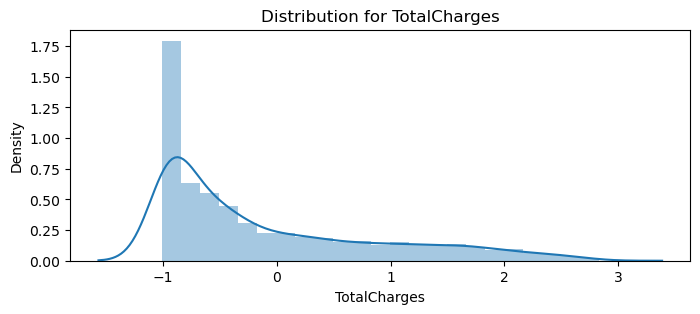

In [35]:
plt.figure(figsize=(8,3))
plt.title("Distribution for {}".format("TotalCharges"))
ax = sns.distplot(df_processed_balanced["TotalCharges"])

In [36]:
logistic_regression(df_processed_balanced, metrics)

[('roc_auc', 0.8532901370979853),
 ('accuracy', 0.7727272727272727),
 ('precision', 0.7630922693266833)]

In [37]:
df_tmp = df_processed_balanced.copy()
df_tmp['charges_difference'] = df_tmp['TotalCharges'] - df_tmp['tenure']*df_tmp['MonthlyCharges']
df_tmp['charges_ratio'] = df_tmp['tenure']*df_tmp['MonthlyCharges'] / (df_tmp['TotalCharges'] + 1)
logistic_regression(df_tmp, metrics)

[('roc_auc', 0.855728864954551),
 ('accuracy', 0.7780748663101604),
 ('precision', 0.7590361445783133)]

### 3. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
train, test = train_test_split(df_tmp, test_size=0.2, random_state=50)
predictors = [c for c in train.columns if c not in ['customerID', 'Churn']]

In [40]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(train[predictors], train['Churn'])
y_pred_tree = clf_tree.predict(test[predictors]) #0.5
y_prob_tree = clf_tree.predict_proba(test[predictors])[:, 1]

In [41]:
results = list()

for m in metrics:
    if m == 'roc_auc':
        results.append((m, roc_auc_score(test['Churn'], y_prob_tree)))
    else:
        results.append((m, eval("{}_score".format(m))(test['Churn'], y_pred_tree)))
results

[('roc_auc', 0.6937358307050856),
 ('accuracy', 0.6938502673796791),
 ('precision', 0.7076502732240437)]

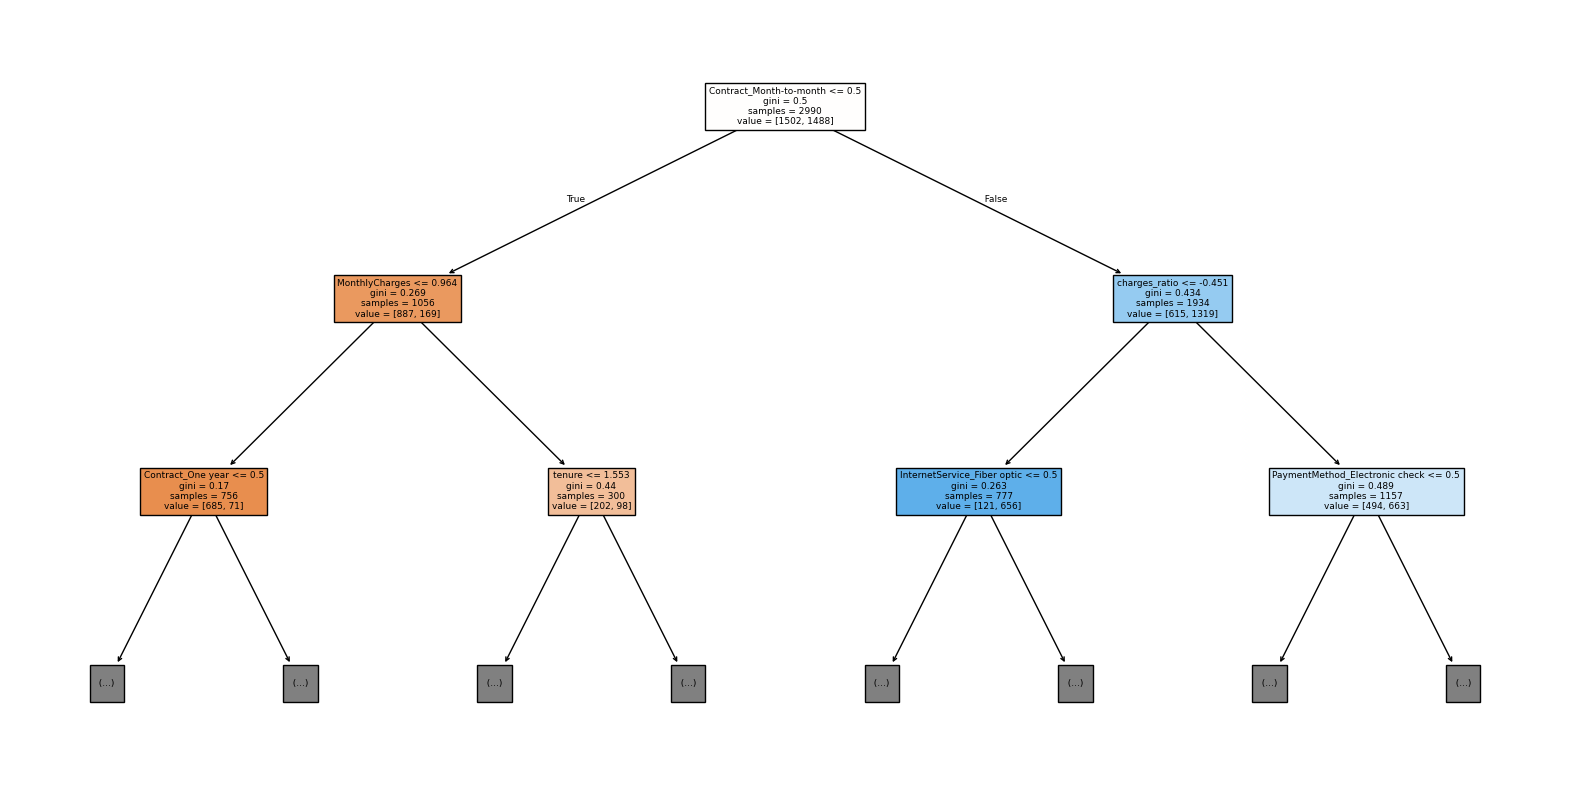

In [42]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf_tree, 
                   max_depth = 2,
                   feature_names=predictors,  
                   filled=True)

In [43]:
fig.savefig("decistion_tree.png")